In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '/home/akanchha/Desktop/Micro_Masters/UCSanDiegoX-s-Data-Science-MicroMasters/Python_for_Data_Science/week-9/Churn_Modelling.csv'

In [5]:
data = pd.read_csv(path)

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#df['profession']=df['profession'].astype('category').cat.codes
#df['media']=df['media'].astype('category').cat.codes
#df.corr()
data.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [8]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [236]:
data.shape

(10000, 14)

In [237]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [238]:
data.index

RangeIndex(start=0, stop=10000, step=1)

In [239]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [240]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [241]:
# lets calculate the distribution of dependent variable which is "Exited"

(data[data['Exited'] == 1].shape[0] / data.shape[0]) * 100

20.369999999999997

So we see in above code cell that around 20% of data means 20 % of customer has churned and this is not an even distribution of datset.

In [242]:
churn = data['Exited'].value_counts().reset_index()
churn.head()

,Exited,count
0,0,7963
1,1,2037


In [243]:
churn1 = churn.rename(columns={"Exited":"index"})
churn1
#churn.rename(columns={"count":"Exited"})

,index,count
0,0,7963
1,1,2037


In [244]:
churn2 = churn1.rename(columns={"count":"Exited"})
churn2

,index,Exited
0,0,7963
1,1,2037


<Axes: xlabel='index', ylabel='Exited'>

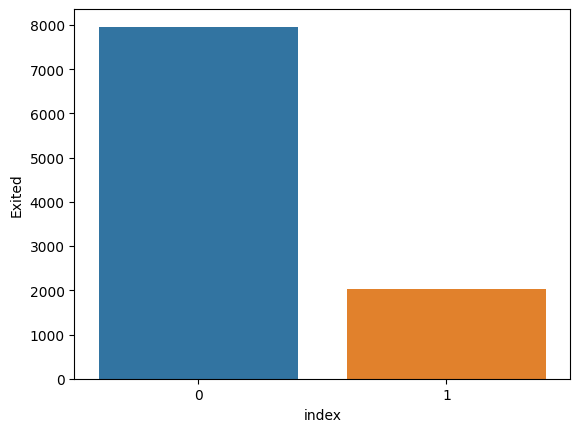

In [245]:
sns.barplot(x = churn2['index'], y = churn2['Exited'])

<Axes: xlabel='Tenure', ylabel='Density'>

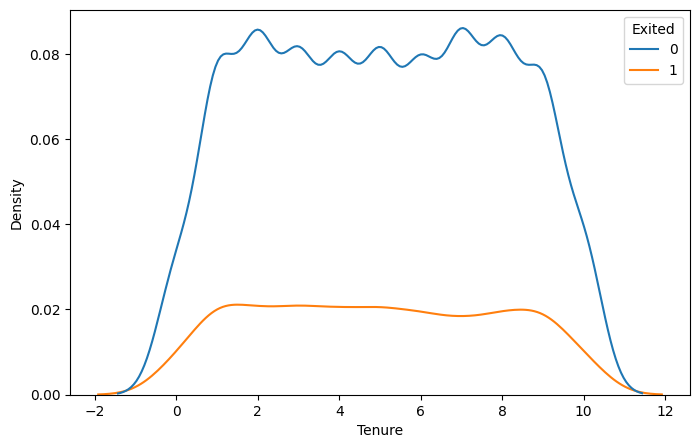

In [246]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=data['Tenure'],hue = data['Exited'])

As we already performed the correlation between variable in initial code cell and found that "Tenure" and "Exited" are negatively correlated means less the tenure more the chances of Exit.So company need to increase tenure time to retain customer

In [247]:
churning = data[data['Exited'] == 1]
churning.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [248]:
churning.shape

(2037, 14)

In [249]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [250]:
def calculate_ratios(ax):
  l = len(ax.patches)
  cnt = 0
  without_churn = []
  with_churn = []
  for p in ax.patches:
      if cnt < 1/2:
          without_churn.append(p.get_height())
      else:
          with_churn.append(p.get_height())

      cnt += 1;
      
  print("without_churn:" , without_churn)
  print("with_churn:" , with_churn)

  ratio = []
   
  for i in range(len(without_churn)):
       ratio.append(with_churn[i]/without_churn[i])
  print("ratio" ,ratio)
    

(array([0, 1, 2]),
 [Text(0, 0, 'France'), Text(1, 0, 'Spain'), Text(2, 0, 'Germany')])

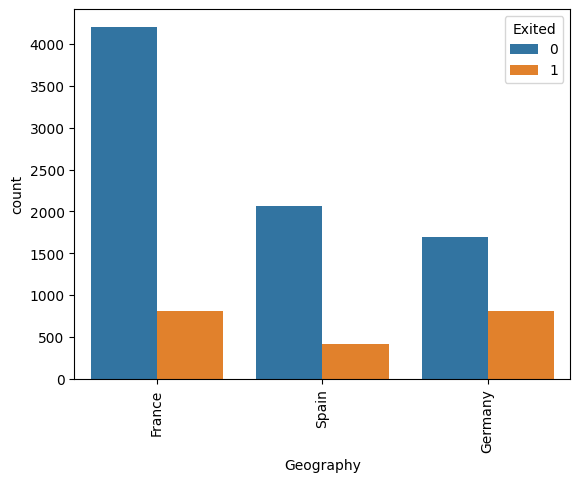

In [251]:
#need to recheck here
ax =  sns.countplot(x = data['Geography'], hue = data['Exited'])
plt.xticks(rotation = 90)    


In [252]:
# need to recheck here
calculate_ratios(ax)

without_churn: [4204.0]
with_churn: [2064.0, 1695.0, 810.0, 413.0, 814.0]
ratio [0.49096098953377737]


Above cell shows Germany has bigger ratios

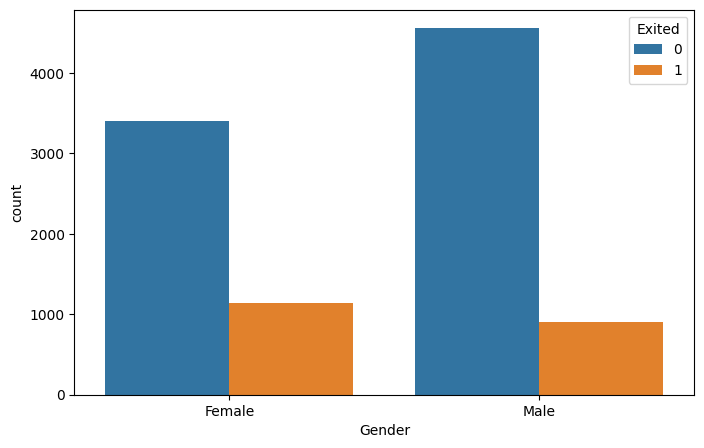

In [253]:
plt.figure(figsize = (8,5))
g =  sns.countplot(x = data['Gender'], hue = data['Exited'])

In [254]:
calculate_ratios(g)

without_churn: [3404.0]
with_churn: [4559.0, 1139.0, 898.0]
ratio [1.3393066980023502]


In [255]:
(churning[churning['Gender'] == 'Female'].shape[0]/data[data['Gender'] == 'Female'].shape[0])*100

25.071538630860662

In [256]:
(churning[churning['Gender'] == 'Male'].shape[0]/data[data['Gender'] == 'Male'].shape[0])*100

16.455928165658786

so we can see above that female customer are more likely to churn than male.

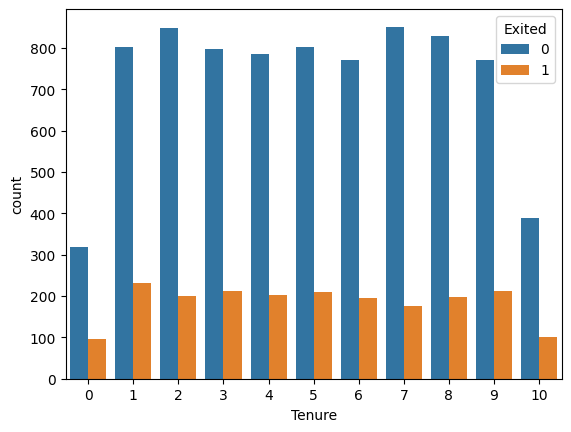

In [257]:
dev =  sns.countplot(x = data['Tenure'], hue = data['Exited'])

Above distribution shows the customer have churned already within one year and most likely to not churn if retained for longer year

In [258]:
calculate_ratios(dev)

without_churn: [318.0]
with_churn: [803.0, 847.0, 796.0, 786.0, 803.0, 771.0, 851.0, 828.0, 771.0, 389.0, 95.0, 232.0, 201.0, 213.0, 203.0, 209.0, 196.0, 177.0, 197.0, 213.0, 101.0]
ratio [2.5251572327044025]


In [259]:
status = churning['HasCrCard'].value_counts().reset_index()
status.head()

,HasCrCard,count
0,1,1424
1,0,613


In [260]:
status1 = status.rename(columns={"HasCrCard":"index"})
status1

,index,count
0,1,1424
1,0,613


In [261]:
status2 = status1.rename(columns={"count":"HasCrCard"})
status2

,index,HasCrCard
0,1,1424
1,0,613


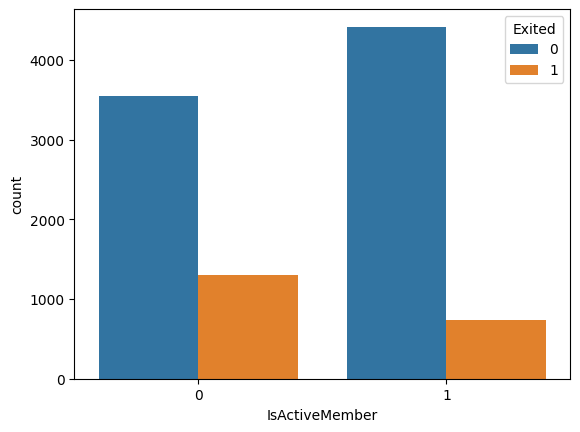

In [262]:
status2 = sns.countplot(x = data['IsActiveMember'], hue = data['Exited'])

In [263]:
calculate_ratios(status2)

without_churn: [3547.0]
with_churn: [4416.0, 1302.0, 735.0]
ratio [1.2449957710741473]


From above cell Customers who are more active are less likely to churn

In [264]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

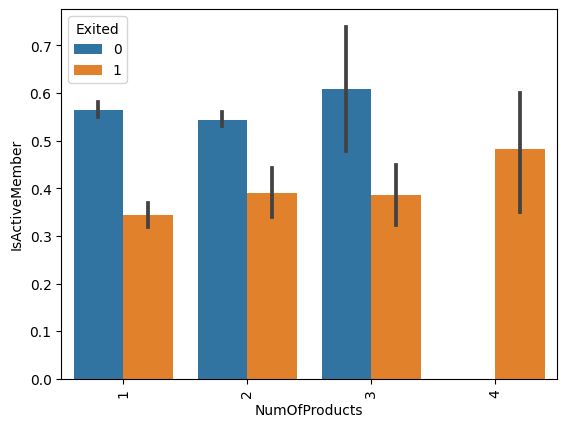

In [265]:
productPref = sns.barplot(x = data['NumOfProducts'] , y = data['IsActiveMember'] , hue =data['Exited'])
plt.xticks(rotation = 90)                         

In [266]:
calculate_ratios(productPref)

without_churn: [0.5654421768707483]
with_churn: [0.5445544554455446, 0.6086956521739131, nan, 0.34421575585521647, 0.39080459770114945, 0.38636363636363635, 0.48333333333333334]
ratio [0.9630594917047047]


<Axes: xlabel='NumOfProducts', ylabel='IsActiveMember'>

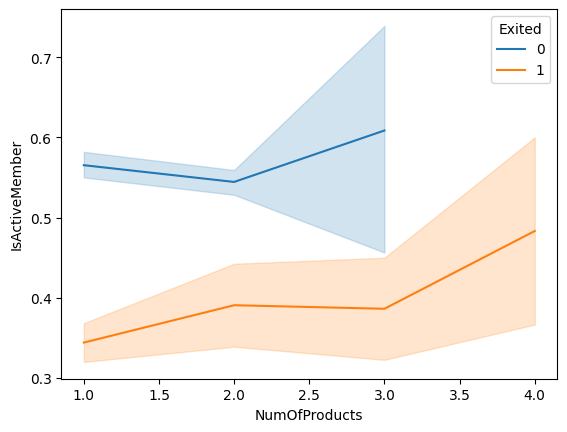

In [267]:
# representing in line graph for above grpah
sns.lineplot(x = data['NumOfProducts'] , y = data['IsActiveMember'] , hue =data['Exited'])

Above grpah shows that the customer with more products are less likely to churn so company should focus on improving product value

<Axes: xlabel='CreditScore', ylabel='Count'>

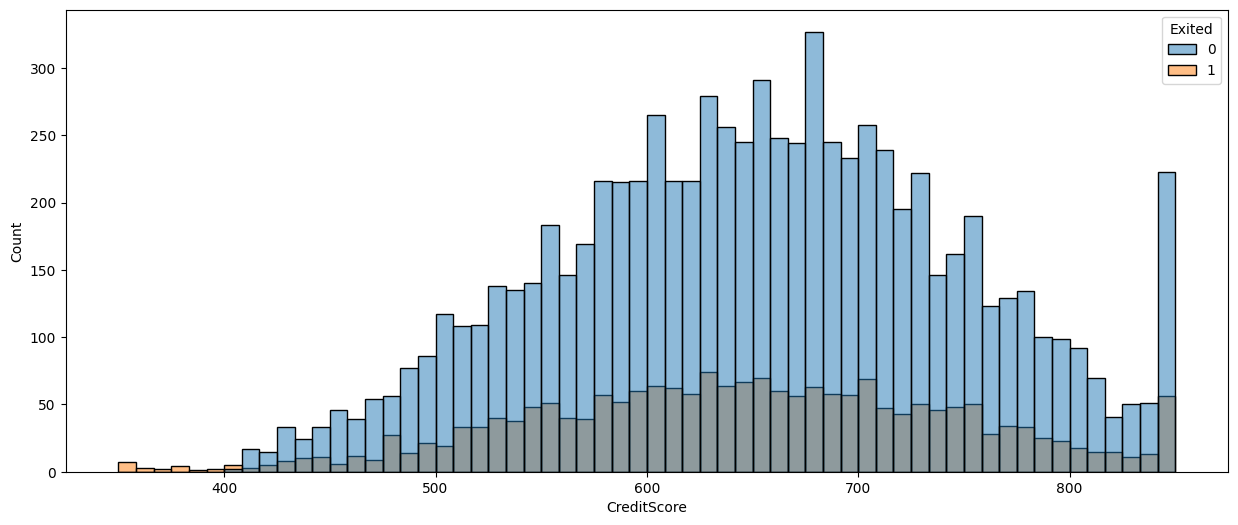

In [269]:
plt.figure(figsize = (15,6))
sns.histplot(x = data['CreditScore'] , hue = data['Exited'] , bins = 60)

In [270]:
country = data['Geography'].value_counts().reset_index()
country

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [271]:
country1 = country.rename(columns={"Geography":"index"})
country1

,index,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [272]:
country2 = country1.rename(columns={"count":"Geography"})
country2

,index,Geography
0,France,5014
1,Germany,2509
2,Spain,2477


<Axes: xlabel='Geography', ylabel='index'>

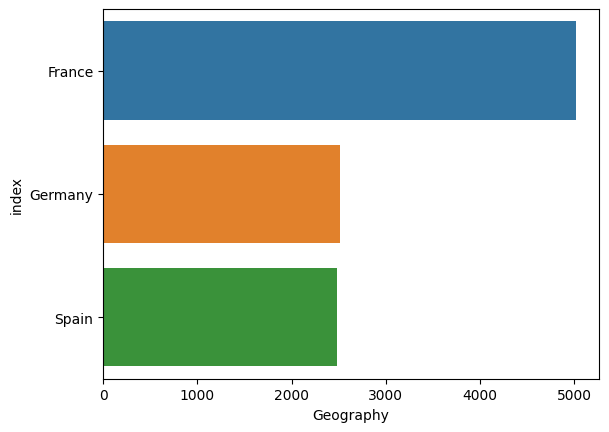

In [273]:
sns.barplot(x = country2['Geography'], y = country2['index'])

From above it looks like France has most regular customer means regular customer are less likely to churn

In [299]:
data.groupby(['Gender']).aggregate(np.mean)['IsActiveMember']

TypeError: Could not convert HargraveHillOnioBoniMitchellObinnaKayChinScottHendersonHaoDellucciGerasimovYenMcWilliamsAzikiweMaggardClementsLombardoClarkeOsborneLavineBianchiTylerMartinOkagbueBucchoO'BrienT'ienClarkHammondBrownlessGlauertPisanoPalermoBallardCavenaghReadPostleBuleyLeonardMillsOnyeoruluBeitNdukakuSharpeOsborneHeapColeFuHungDunbabinMauldonParsonsKoWelchDuncanChidozieCameronCalabresiZetticciMacDonaldKennedyHeKaodilinakachukwuArthurLiChiaVasinForwoodTaylorMadukweBennelongMorganAlexeevaMilneLiClaytonMacleanChigolumWilkinsonTreacyHuTaubmanRobinsonPintoHawkinsFuHoCampbellAshboltRozierOgbonnayaCocciT'aoFordTsaiOnwumeluGrahamMoranOnuoraMcDonaldGlassmanMillerMillarHayCh'ienCattaneoLucasSergeyevSmithPachecoSynnotJohnstonTsaoIfesinachiDimauroHughesMorrisonMatveyevaRoseJessMortonRossiReppertCh'iuFieldingZetticciBoyleDubininaChiazagomekpereWallworkDavidsonO'DonnellAhmedChuangTienChangEfremovHartleyChiuPokrovskiiSkinnerMcEncroeGordonTs'aiYuanHunterHsiehKnowlesDayTsaoNwabugwuYoungKerrMarreroPisanoBrownFreemanSeleznyovIkedinachukwuAmosSimmonsRobinsonBianchiChenIbrahimovaNolanScottMonaldoColeAngeloKoDistefanoFarrellTingBlackWhiteheadIkemefunaMorrisonCelisChengMillsOuthwaitePaiMitchellFranklinKoFiskChiangHeathDellucciLiDe SalisT'angRichardsonStevensonWeiPisaniMannaRicciCarrFindlayHughesChukwuemekaGenoveseSwiftRossUspenskyCookNewboldHeHiltonSunEvansOlisanugoBrookesElewechiPisanoAnkudinovBurnsLewisKirbyMartinTanHsiaWesterbergKryukovaSeleznevaFreemanLoKingForbesMacleodPisanoVassilievMacartneyChinLuWaltonBrookesShihFerreiraUkaegbunamDavideLittleBurnsHanReichardPriceLuRitchieMackenziePendergrassEvansBillsonTengCh'angGordonObialoLinMcKayRevellRickardsBegumOnyinyechukwukaMaOkwuadigboChanGrecoLombardiAlexandrovaFallaciHudsonMaiStoutDuncanAvdeyevaCrawfordGetherLarionovaSteinhoffPaiCraigCh'iuRahmanMcMillanPickeringMiramsJideoforBellMcIntyrePagnottoFengDonaldsonChambersMarceloEjimoforDaleStonebrakerAndersonSageseGrubbNapolitaniAkeroydWallaceSmallBledsoeWertheimJarvisP'anPugliesiBlakeyAchebeRussoMaccallumWatkinsMitchelFerdinandChinagoromWalkerHaoSavageCooperMazziNichollsYuanGolubovChenKambinachiFlemingCunninghamChinwemmaYinTs'aiJenPrestonCodyMilaniOnyemauchechukwuGellKirillovaOnyemauchechukwuMueckeHsiehAzubuikeFullerAshleyTs'uiChidozieMacleanBurnsChuBeluchiWilliamsonMcKenziePittsShenShihOwensVercoGalkinSummersMunroVirgoPadovanoTaoFraserAlleyHowellsHooperRiceIkennaDavidePiazzaBlackChiabuotuGallagherShawLloydAventShawYuanHawkinsTrentiniCameronWuOkoliCh'engNwokezuikeAbbieJenUnaiponWanChambersPettitBaresiIheanachoNucciRohuO'LoghlenEvansMcGregorAndrewsChiazagomekpereChidiebeleGregoryBednallJenSheSimmonsFraserSeabrookBarwellBallSungT'ienFallaciLiChukwukadibiaOluchukwuWollstonecraftThomsenLambGallagherHeathTs'aiKnuppShephardAvdeevaHsuBuchananYehY?anLinSchofieldWallMilaniEjimoforWickhamBirdWoodCh'inYusupovJibunohTs'uiWilderMacleanMcNessColesBensonGilbertL?GrayWrightPalermaY?anWeiPadovesiFranklinMcGregorHsingWatsonHawkinsGinnArtamonovaHansenPaiLarsenMurphyEkechukwuJohnsonBardinTalbotMcGregorZikoranaudodimmaMaiNaylorPintoCrawfordVolkovaCh'iuAbramovichTimmsHamiltonChengKoChukwuebukaMacDonaldLampungmeiuaEnyinnayaMaWoodSmithIngramHebertDumetochukwuJamiesonChiganuWoodsBluettChapmanUdobataPalermoFallaciPerryMaslovaMcLeanPatersonTisdallMironovaNdubuezeStephensonMullanNortheyPatersonMacleanColmanJacksonHanWilkieBrayAnnSouterGrecoBlackDuncanMitchellFerrariDicksonHoldenPageSamuelFittsTs'uiMillarDemuthGenoveseLawlessBrooksIgnatyevaBalmainMillarLi FontiBeneventiDespeissisHsiehLongoManciniGrantBrennanRischbiethOtutodilichukwuThomasFiorentiniHughesMcIntoshBaranovaGenoveseSorokinaErvinNobleParkinDochertyL?JohnstonePhamBergamaschiMurphyOsinachiMuravyovChidiegwuLucchesiHargravesBuntonCameronKungContiSimsMcGregorChuDumetolisaWanCameronTretiakovChungLaiDavidsonJusticeEwingChinMarshallGrantNnamutaezinwaFerriAndrewsMurrayMcWilliamCarterCh'iuTsaoFanucciVasilievaLongoBocharovaMorresVogelWisdomShahanChidozieHaywardAlexeevaCalabresiLettiereNnamutaezinwaYinGolubevFedorovKennedyChanHsuWhiteTsaoHudsonKinlawLuccianoOmeokachieTikhonovManciniTuanJohnstoneRomaniBaxterPirozziSungRogersMillsOsonduagwuikeMcIntyreAitkenMacintyreSimpsonMetcalfeDaleByrnePraedLaurensWoodsBykovPirogovaSturtPanicucciFranklinP'engChiangGrantSicilianiYoungMitchellLuccheseHewittEndrizziLudowiciLarsonChigolumLuTuanLandmanLongoAlexeyevaSimmonsIngramOkekeShaoDiribeMacgroartyMcDonaldMazzantiKellyDavisonTrentiniHsuZhirovEspinosaWallaceBarbourWrightUlyanovaAkabuezePintoMcNeilJohnsonKaeppelShihYudinaAkabuezeOziomaSuJamisonHardimanO'BrienTaoBucklandGenoveseVincentBlackburnDuncanMacarthurMedvedevSholesRolonBlighDavidsonLambleMooreJoseTrevisaniSchofieldStewartJamiesonBrooksChinweikeSimpkinsonWalkerConwayMaslowL?GalloOnyemachukwuDicksonP'anFrostWarnerIfeatuHsuehShihWhiddonOnyekachukwuNiuMannaMitchellEveringhamCrowtherSwiftWhiteGiordanoDaySerranoCunninghamStephensBevanMashmanTuMilanesiRomanoGoliweGrayWrightChiemekaChungSpitzerPotterMatthewsMiahBaddeleyHs?ToddIgnatieffLuArtemievOkonkwoBurnAndreyevEndrizziBrownNockOkekeBorchgrevinkBradleyHudsonVeltriGolibeCurtisHaydenCampbellCremonesiLiangGoughPadovesiYinKharlamovNichollsFlemingHanFergusonValdezPirozziColomboAkubunduY?JideoforRobertsonGrayTownsendPopeJensenThomsonWrightLombardoLeonardAmechiHortonOnioButusovWangAlexeievaHughesBageTangSwearingenMcGregorClarkeKozlovaNekrasovOlsenMazziBellKellyWillisWallaceChukwuraenyeMarshallHaywardMoreyToddForbesDe SalisMarshallChinedumMcKayOtutodilinnaPaiKruglovKingTingMcLeanZikoranachidimmaFuTrevisanoChuangTheusJenningsParkerTuanPattersonNashObidimkpaAmaechiFoxallBentleyBairdHowardSopuluchukwuRocherWhiteKomarRussoLoewenthalMontesKuoChengMcIntoshT'aoOnyekaozuluNwachukwuChristmasMooreGenovesiEllisNebechiY?ContiIgnatieffPerkinsConwayRizzoKrylovLi FontiTalbotMatthiasBoyleCh'engBrunoMillerFuO'TooleLedfordIadanzaLinBarclayKodilinyechukwuMcKenzieWoodsPadovesiGrecoGiordanoMillerRossTrevisanAleksandrovaDikeDellucciRitchieAikenheadKungMacDonaldOkwudilichukwuSimmonsH?HancockMcKayParkhillGolubovaNwankwoMcElyeaRosasPalermaMorrisPavlovaLuAngeloGorbunovRoweMikkelsenMbanefoHamiltonWestChukwuemekaCastiglioneYuanWilsonKentVasilievFedorovaRossiSamsonFentonPaytonBanksBentleyWongShenHuangYehShihDellucciRobertsLo DucaGloverJohnstoneCaponPatrickTaylorStephensonCollingridge de TourceyJibunohKorovinWardK'ungBarlowBensonToddBurginNnaifeOkwudiliolisaParkesPageAmaechiPanicucciNapolitaniBeersCostaIbezimakoMarceloLumholtzHillPirozziSynnotAnenechukwuPlantAzubuikeJohnstonBabbageBogolyubovChiaSmithFordGregsonHaySheUwakweBirdKrichauffWoodWhiteTuanHansonMacDonaldStanleyFischerOgochukwuAnenechiOkwudilichukwuHarrisonKoNormanMackenzieCraigieOnyekachiNwabugwuDeRoseCh'engObielumaniEmeryDufresneLeeHsingMossRossCalabreseYobachukwuMarchesiPickeringMazziTrentinoMarchesiAnayolisaPooleZhouBatesWadeTanNgozichukwukaDavyMaBarreraNgozichukwukaHallPadovesiLysaghtKelechiHansonKaoTuFallaciShenTs'uiChikezieHeDreyerShortTengMunroTangGreenhalghHuY?anOdiliH?YuanKolesnikovHsiungBronnerMironovaKuEvansHendersonSmithSunMcDonaldNiuZetticciLe GallienneP'engWheelerChristieKingWaynY?WangLorenzoNuttallOsborneHamiltonMcEwanLaiBoydTrevisaniHolmanBazhenovLinSinclairKempEbelegbulamTsengWilsonIadanzaY?ChukwunonsoTs'aiIfeanyichukwuBriggsMorrisonCh'angChidiegwuGowAmaechiBibiNiuArtemievaOwenFranklinLorenzoMurielMacDevittGibsonWhiteheadJohnstoneJohnsonKaoBrowneLeiAlexeevaTs'uiKungUnwinFraterBrennanGolubevVanmeterHs?CrawfordP'engFlemingWilsonYuryevaGalloChouShaoMazzantiEndrizziMonaldoOtutodilinnaMilneChiokeKovalevDohertyBaranovRobinsonBidencopeT'ienChungStevensonSeppeltMcDonaldMcGregorMcDonaldCrawfordGibbsMilneDicksonToscaniHughesAksenovK'ungMilanoChukwuemekaRiceBrownAksyonovaWalkerAbbottDavydovaWestSmithFiorentinoNkemjikaMarioDubininaHsiehMoranLiObialoBatesonLongBellUdineseMaoFanucciYehMooreThorntonWarlow-DaviesLeiWrightBoyleUwaezuokeArchambaultHolmwoodY?ChidubemRandallLeachWallaceMitchellRoweChibuezeWilsonYehGoliweAnthonyGenoveseDaveyParsonsTs'aiWittKazantsevaBeyerFriesTaoKaodilinakachukwuBeckerGrahamKuoZimmerCaldwellYirawalaDonaldsonOzerovaTs'aiTokarevaPagnottoSinclairHsuPanicucciBurnsDarlingMaggardThomasPonomaryovLuccheseSazonovaHentyAzukaAlexanderShenPadovesiLordPaiYuanPowellBrownMcChesneyEndrizziPanManfrinKennedyConwayLablancDoddMuirMilanesiLiaoUdokammaPalermaChimaijemNwagugheuzoYoungPadovesiLorenzoWeiRossChidaluPotterHuangNakayamaGardenerMilneKudryashovaKruglovaPalermaShafferChungWhitfieldRiouxBrimTrevisanoHelenaDuncanWellerBessMacDonaldMaiYehBabbageRandellPatersonMacleodRandolphKudryashovaGeorgeRobertsonYuryevaKingMontalvoScottYehViganoTuanTienHamiltonPowellWilliamsFetherstonhaughSeversonGroverMilaniChienMarshallUspenskayaThomsonHerreraMuseMarsdenArtemyevaChuangNichollsKnightWebbNebechukwuNixonLombardoHollandBryantHaoKovalevHsiehDebellisYenLuStewartMilanesiSalDouglasYatesWattPerryLavrovJenkinsWilsonBegumFrolovChikezieZetticciYangLinTs'uiGenoveseWilliamsonShoobridgePengWatsonSolomonTuanDanielsCaldwellFangDumetolisaMackayKenyonKennedySteereSutherlandLungCocciMatveyevaMooreYobachukwuFlemingAksenovFlemingUlyanovPirozziMahonShawScottVossWilsonGibsonChikeluYefremovaChuangGarranMorettiYaoBaldwinMahonMuirLyonsGardinerChapmanHePattersonCoppinTsaoStewartFallaciTienScottGerasimovaIfeatuOgbonnayaDegtyaryovMonaldoCarpenterTylerMartinWalkerBottrillJonesSanfordChienChimaobimJowersKirsovaT'ienKuChinLawChungGreavesO'DonnellHsiehChiuReevesChuMarshChangPottingerFollieroChambersYenAzikiweAllenMackayYuFangPageOlisaemekaBrennanSuttonHydeSungBeneventiCh'angBartonLucchesePopeHorrocksChikezieFryeMellorSutherlandTingChuangChuOzoemenaHowellsLuccheseWoronoffWilhelmNebechukwuAnenechukwuMeredithChinomsoWintersNapolitaniRobertsonMarchesiBibiRussoBallardThomsonMorrisonScottCameronTateNealOnyinyechukwukaFulksChristieBallOsitadimmaHaoHartleyAllanNnamdiRomanoLungFetherstonhaughDavidsonMaiMitchellKentPepperWilsonHarrimanFranklandPintoChiuYuTo RotAnenechukwuHendersonEllisKangLearMazzantiMarinoWinterT'ienHughes-JonesCodyEstradaDickinsonFanucciLenhardtCh'ienSunJamiesonNolanBarryPhelanHotchinAksyonovDuncanPisaniPisanoTennantTobennaVicarsYangT'angPaiFranklinPengHellerDunnHollandButusovAtkinsonObiajuluSuTraegerChinwenmaTuanRobinsonCarrPalermaChinezeMorettiHaleBensonMishinaAbramovichAlexeyevaKilgourSheppardNnannaNorrisClementsOkwukweMurphyElliottLoggiaWalshDolgorukovaSheCookMoyseySkinnerChinLungMellorRichardsonWanBradleyCalabreseOsonduagwuikePanCarpenterTrevisanHeMorettiChukwuelokaFiorentiniNepeanNwebubeUgochukwuMurphyDochertyHirstHoranCumbrae-StewartKinneyT'angToscanoNinaBrunoKennedyVasilyevBlackNapolitaniHughesLacrossMaughanPalermaSlateCh'angChiebukaT'anLazarevWarrenTrevisaniTrevisanoLiaoListonThompsonMilanesiRudduckUvarovaGalloTs'uiCoatesHickeyNortonManciniTienMurphyMacleanBlackburnWyattShaoNapolitanoMarceloFominNkemjikaCh'angCrottyCocciIroawuchiHysellWilliamsonGinikanwaMorleyComptonWanChangDyerWattsFedorovaChiedozieMarceloMcMillanHardyAdamsonMishinKangKellyBullFergusonSheHamiltonSummervilleTobennaVolkovaNucciKuHsuehRicciAzubuikeNevzorovaLeiSheehanKelechiMcElhoneAtkinsColomboOnyekachiThompsonShenYehHsiaZarateRobinsonNevzorovaQuinnPisanoArtemovaUgonnatubelumReillyOmeokachiePintoGardenerFangLabradorGibsonIvesOmeokachieMaoBrierlyMcDonaldBergamaschiBergamaschiLeesSeniorNwokezuikeEkwuemeEnyinnayaHydeCameronCarpenterLorenzoSleemanWilliamsonWangOnyemereDawsonNebechukwuGrahamMicklemOnyekaozuluKegleyThompsonRomanoBrownMackayHsuGiordanoAksenovLongHanBelovRuddMonaldoGidneyDaltonHsingWarnerWilliamsDunnKerrKingGriffithsHartzlerBaresiLambertGameChinagoromNobleCattaneoFraserJimenezOnioTomlinsonOnuohaVorobyovaToddCremonesiJowettYefremovaGadsdenNiChibuezeKangOsitadimmaSmithOkwudilichukwuPorterPonomarevYinAkobunduErmakovaOsterPeyserCocciSeleznevHuangZikoranachukwudimmaNkemdilimAndersonMcGregorPisanoOtutodilichukwuRickardAndreevSteeleBlackFedorovStehleAlexanderMcIntoshSungChinweubaT'aoCh'ienSuLoyauPowerHillHsingBakerMatthewsChouMazziBlackRichardsIgnatievMillerCoxLaneT'aoHsiungParryGolubevFowlerLockettAkabuezePhelpsFrederickBeneventiGreenCarlsonWattCaldwellEndrizziFiorentiniOwensWangHsiehFiorentinoEfremovTangTangFedorovGboliweKoSeleznyovaBevanSalierEvdokimovHsiaoWrightDellucciCaldwellEvseevKirwanLittleCh'iuMcKayKozlovaCoatesIgnatyevIgnatievMunzPalingClarkHsiaoPalermaGalloOtutodilinnaMcGregorH?FerrariNkemakonamKirillovAnkudinovGaffneyRomaniKambinachiHawkinsFangChouRamsbothamScannellTuanShaverWallisLo DucaWanLittleHillBoyleShenShephardDavidsonFerrariMatveyevWangYuanMcConnellAlexanderGordonDaviesSandersRiddleContiDavisonUdinesiBellJacksonMaBasedowNworaHoweyPaiKramerSochimaMarchesiHerrinGardinerAtkinsonHuSandersTsuiMarinoMorrisonMaiHs?ehDemaineDickinsonKazantsevaPanBischofAshtonWilsonKuOnyemachukwuKaoFerriYashinaYevseyevRapuokwuMaslovColeAllsopDumetochukwuUspenskyGarciaSotoStephensonTuColbertOwensDaluchiDysonDavideHs?NicollRomanoMannaDanielsHuntYuanCalabresiMartinMaslovaLaiWatsonGorbunovRaynorEberegbulamMannaChangKentMiccoBremerDavidsonMilneWeberLettiereTaoAlgarinKorovinaChidubemMetcalfGrecoLi FontiMaduekeChukwubuikemHollowayAnayolisaFangFanucciMcKayBogdanovaLavrentievMaduekeNiDennisL?CardusWhitehouseChiaCalabresiTs'uiMcCullochMillerMunroLaiMaoCrossSniderHarrisonHayTangIsayevaHillMorenoGillGreenOnioVaguineMannaToomeyBellBonwickHoltBrownCh'angFengLujanProkhorovaRomeroToscaniOnwuamaegbuKingTrentinoPeacockNnaifeChaoBareseUdegbulamDegtyaryovMitchellCh'enEfimovWadeMurphyHannahCartagenaHuntGreeceThomsonKrawczykChouSullivanCavillNichollsNnonsoNkemakonamLintonOnyekaozuluTobennaWangStephensonKangMillerKryukovHs?AndersonTrentinoTsouJohnsonAllanButcherHendersonObiajuluKellyIweobiegbunamWilliamsonChiagoziemKwemtoZitoUkaegbunamEdmondstoneChienYashinaGeorgTungChuangChidimmaMcCaneParry-OkedenKhanMurrayShillitoHowellsIkechukwuCoxLoStevensonSamsonovaNiuBockKungNwankwoQuinnKodilinyechukwuSullivanJackaTsaiEmerySharpCampbellAbbottPrestonFanucciJohnstoneHortZaytsevaSorokinaOnuchukwuOsonduagwuikeThomsonGoliweOnwuamaezeButusovRossiHuddartChinomsoHargreavesStoneAllanBellucciDuncanFindlayIzmailovaShenChinwemmaGolubovaMcKayFedorovaFloydLongCastiglioneMelendezKovalevaGillStevensonGilroySidorovBatesFanucciIroawuchiMartinSinclairSwansonFominMatveyevaMadukaegoFerriDavisTsouEjikemeifeuwaVolkovaRyrieAndreevTs'aoMontemayorWhiteheadFrenchConnorJonesLiDenisovaBensonKalininaChiawuotuSergeyevChristieRobertsonBareseTrouetteUgochukwuCribbMcIntyrePickeringFletcherPisanoHooperHeSomadinaMcIntoshBrombyHunterSheppardLaiPadovesiKempGreeceYoungForbesTs'uiMilanoChaoNapolitaniKovalevaChiebukaGordonConwayBattyRoweFarmerCameronJenningsEluemunoSwiftPisaniCameronYehGouldChidumagaChildsLungNapolitanoHutchinsonObiomaStetsonFanucciThaoMurphyMcConnellWalkerIheatuCh'enBrownBuddicomMcGregorThompsonWarrenUspenskayaKingTrentiniNeumannWaltersLiebeWhiteMyersRogovaRaffKanayochukwuObialoLiuPonomaryovCostaWeiPriceSawtellSimmonsPengBevanSokolovAmadiFindlayHsuEvansTungRossYangGayMorrisonMaoBrunoGrayChiangSungYenFerriHsuBishopDaigleCochranBibbJenCorranLoggiaWilliamsonGordonLynchK?OwensSteelePanNnabuifeBrayEsomchiIroawuchiRetanaRobsonBrunoPriceSwansonChangMorganOsitadimmaCunninghamFieldsColomboChikereBallardGormanJohnOkonkwoBoniPrattPageWilkinsonFinchMannaSalIweobiegbunamShaoHeathWuDownieFindlayCh'engTsaiAllanWangYancyMazziNucciY?NucciTangKaoChenYaoTsouBukowskiFrancisCalabresiChimaobimFengWhiteManfrinUdegbulamKaoRoss-WattMillerShubinCartwrightAzukaShenAbazuMurphyGratwickPaiBradyHsiungMilanoLewisDyerHsiaHicksYoungFrolovaSabbatiniIfeanachoHansonBradshawClunieHodgsonDobieOkwudilichukwuDyerBaresiLoTylerAparicioSalOziomaWoodMcKinnonLeesFeethamChuangAhmedOgochukwuObiajuluYegorovaTalbotChukwualukaWallacePisanoPalmerTanMordvinovaMorriceBarrettBowhayLeiBakerMacnamaraArnoldKochJonesOtitodilinnaYewenSimmonsMbadiweMunroPirozziPiazzaBaranovaMarinoSabbatiniBlackSchwartzSargentUdinesiLeeOzuluonyeLassetterIloerikaTanGoodwinRapuluolisaTsuiSummersBobrovPikeGearheartBrunoZikoranachidimmaMilanesiAhernDicksonMcDonaldFiorentiniBianchiFallaciPiccioKaodilinakachukwuAmaechiP'anIkemefunaWinnHardyChiuDohertyRussellPayneWindsorY?BrownBaileyAllnuttChristiePopeJohnstoneJonesGenoveseBaranovY?LoElliotCarandiniVinogradovaAlexandrovaBarkerBrownKorffMathewsMacrossanIllingworthMenhennittPalermoFyodorovDolgorukovaEvaP'anJenkinsShihNnamdiMitchellFindlayPisaniK?TrevisanoTrevisanoTuckerSchafferCh'angWalkerChuCrawfordDonaldsonKellyTs'aoMuravyovaLambertYoungHsuehRobertsTakasukaDawsonOliverWilsonHigginsMarshallReyeChibuezeMaslovChidumagaHs?WilloughbyOjioforCameronDalyDikeGreenChinomsoIjenduArcuriBaresiChristianTrevisaniAkabuezeDonaldsonBentleyIbezimakoCh'inMcDonaldFaulkWalkerBrownWuMillerChamberlinButtenshawWallaceCalabresiBryantTuElderTownsendMilanoMartinNiuArcuriCh'inNapolitaniDunnDeRoseHobbsAndersonUgochukwuKirsovaFergusonKellySheCreelThompsonMarinoSutherlandNicolayLoriSomervilleChristieGraveLoriChukwumaCh'ienBishopChibuzoCalabreseLoganSimmonsMaduabuchimYehStevensonKenechukwuDicksonVolkovaMitchellWongJamesWatsonFollieroFitzgeraldGarnerFollieroLucchesiNwabugwuAndrewsOtutodilinnaGrantDonaldsonSmithBinderZubarevDavydovaTengHsingWilderMolineuxCocciChikwenduFraserKorovinSidorovDuiganTaylorDonaldsonCrossMannaGibbonsAlgeranoffRoweGallowayGenoveseMiahSmithBurtonKamdibeRossHawksT'ienMacleanFrenchGreenwoodMistryFiorentiniScottSmithMossNwankwoAllanHendersonSutherlandMarsdenCrawfordDilibeSantiagoToscanoAfanasyevaOlisanugoPriestleyRobertsonIfeanachoLi FontiGoloubevLiaoSinclairRobertsTsouGrecoMcKenzieKerrCraigTengJamiesonKayHoltCh'enBakerFengSternbergShepherdBarnettGreeneJohnstonMillerWallaceNorthCalabreseRobertsFinchMarceloMatthewsGoddardSimpsonFengFollieroBrayCarpenterForbesAmaechiBurkeChiganuLuccheseLombardoGonzalezFordGillelandFullwoodMontalvoDoyneCaponRawlingAnkudinovaKerrMannaSicilianiPowellWhiteBrownRoseHanCalabreseRileyBiryukovBroadhurstGenovesiHsiehChukwudiIqbalTengDuncanGarrettMazziEdwardsSicilianiLogueO'BrienStewartBattHopeKruglovTrujilloPagnottoDeRoseChiangOnuoraManciniMossPanKuUspenskyKummCareyFarberFindlayYuBrownLindonCaldwellLi FontiCaponHuguleyHorsleyMassieSinghH?GrantLawKingRomanoParkerAitkenHughesPisaniY?anChinFuNiSunBocharovaSinghChiemenamWestPollardGodfreyMazziAllanBrownUvarovWisdomSmithChidimmaTingBergamaschiDyerJonesNebechiIbekweNwekeAbdulovChukwudiPerkinChukwudiSimpsonWallaceLi FontiBondStirlingUdegbunamCandlerFrancisMaiJohnsonShermanYaoKazakovaChiganuNucciSerenaMcLeanWilsonHsiungFollieroJohnstonPalermoNwabugwuEndrizziUdobataShawCumminsSaundersAngeloZhdanovWhiteChuEnyinnayaMcElhoneHarrisKaodilinakachukwuHoweKnepperMorrisMcDonaldReedTengHandOnyemauchechukwuChiangYobachiMunroTrujilloWilsonMillarBeneventiChungBerkeleyWrefordWollstonecraftCartwrightHarperStreetonT'ienCunninghamSmithForbesJohnstonMcDonaldChenCattaneoCh'engCrawfordGibsonNiuLawrenceWagnerArgyleOfodileChiemenamCraigArcherBrownT'ienHungScottRahmanCookeVolkovaHawesSmithSwantonGreenHanCrawfordBeaversChibugoAbdulovBuckleyPeelHoldenFindlayWyattRapuluolisaBucklandOnyeoruruLaneyFuTienTuanMessersmithBrookesJollyPagnottoLucchesiHughesBurnsLambertBensonParkesCastiglioneFinkAfamefunaPalmerZuyevaJenAlekseevaChiemenamChiemenamClarkFanucciCattaneoBentleyHolmesAustinCollierHs?MarinoFlynnChaoYehKleinMahmoodTuShcherbakovBrowneFergusonMosleyEverettKuoRouseFangChiemenamBurrowsTrevisanoSageseLongHsuehLazarevBenjaminRomanoYermolayevaSparksWhittakerHumphriesCremonesiKuTobennaOkwuadigboJohnstonRossTsouEndrizziElewechiChuMcGregorUgorjiWarlow-DaviesBuckleyFairleyBoothbyClarkeKoMcGregorFernandezPanEspositoKaeppelLambLeiContiYermolayevKerrWatersKolesnikovaSharwoodBufkinNwankwoWillisKungHowellsBevanJohnsonHigginsCoxSergeyevaNapolitaniBeathamHillChiuSunLawsonT'aoYaoBracewellHsuehHightowerGenovesiLoginovLafleurObidimkpaCh'angMasonSimonStangeWeiCh'engParsonsPanCameronYudinaUdineseChinweikeBergamaschiMillinerKnowlesGregorySukhorukovaFlemingKennedyKoDanielsKazantsevaFerriEluemunoO'BrienLavrovSomadinaColomboZitoGiordanoDavideLuccianoTaiOsinachiCunninghamMaiDownerBochsaBirdseyeMoonBellucciBareseFlemingBellChristmasScottChukwudiFangBlakeGreenSabbatiniBoardHoGordonMcDonaldBrowneBoyleMorettiUkaegbulamNwankwoNiuShawChristieOnyemauchechiCrawfordMellorChristieWatkinsOjioforMengMactierHsuehNnachetamYuReadLevyChiuAliyevRileyToscanoWarnerCh'iuPyeChungArcuriCaponTrevisanJohnMacleodBoyleChukwuemekaBryantHackettMajorOgbonnayaMaMartinJacksonTaiFindlayChengMartinSkinnerBirdsallTsaiOguejioforVinogradoffNobleChibugoIgnatyevaChiemelaPokrovskayaChukwuelokaChuSpenceLongoBrownUspenskyCantamessaAlexanderChinagoromYangMarceloSimmonsDeRoseOnuchukwuTeakleCrossJonesWalkerDe SalisOliverBrookesChallisIbeabuchiBlackallSchoenheimerFiorentinoFanCartwrightBromleyBergamaschiShubinaKinderShepherdsonShortBelovBursonNichollsKuVasilievaOmeokachieLindemanMcKinleyIbekweMcVeyMaiHanHorsfallClappAzikiweZubarevK?BallL?GrecoWatersSeleznyovaReidFraserHowarthDavisChiuSunderlandFanParryPalmerNicholsonAdamsCocciTrevisaniHayesShaoCastiglioneHurstAdamsonJamesPavlovaBarrettHouOkekeKodilinyechukwuBoyleHsiungKennedyNortonZakharovChimaraokeMcGregorBrownFredericksonMcGillSinclairHortonGilesSarrattBulgakovOnyemachukwuRiveroLaiHornungDennysYurievGibsonZikoranachidimmaMasonRizzoThomsonIgnatyevWoodsLoBurnRussellJenLo DucaOluchiWarnerSalierGibbonsMcCawleyYangVavilovTeagueChiemenamHughesLoggiaCombesOnwukaScottOsonduagwuikeDonaldsonMaObiomaCampbellSimsMcKayHuangCampbellBoniGorbunovaGenoveseOfodileLoChukwuemekaArcuriGrahamMacleodChukwukadibiaTs'aiLuKentBlackMcMillanNgozichukwukaY?anSungKuOkonkwoKuSomayinaFullerCraigCremonesiFengH?JaraO'CallaghanLavrentyevTrevisanMasonTuckerTerrySantiagoWallaceKingMayNnachetamZhdanovaFangSinclairBegleyIkennaSunLettiereSmithChielokaCocciHansonMacleodRitchieIkemefunaChiangLevienOkonkwoMarceloCastroVoronovaLoggiaGrantMartelMengHayVoronoffTrevascusHansenCraigHallSunJacksonChigozieDouglasPettryPotterShawUdinesiBurrowsToscanoVoronkovSalKennedyGarlandDochertyFominWrightChinwenduWhiteHaleRossNkemdilimMcMillanDukeBradburyCreminGilchristShihPaganSandersonSamsonovaSandoverChuOwenHurstHardingSmithMooreKorovinaHardyShawKnightBrunyIkedinachukwuYinMishinaGrahamJohnstonLeiChimaijemConverseReidBelsteadDickinsonNworaLoggiaRoweUlyanovaRemingtonMishinAyersCocciMackenzieAkabuezeHydeNwabugwuChinHeVachonBallMonaldoHamiltonKuoFanOlisaemekaHillOkekeMarcusRussellHovellChukwumaobimBoyleScottJohnstoneDellucciBrothersSandersZetticciHsuehWrightGalganoGrigoryevaRaymondBrodneyAngeloMillarBalashovAfanasyevChialukaYermolayevSaundersWrightMcGuffogChukwujamuikeScottBellSargoodHarringtonSutherlandMordvinovaSchofieldBairdWhitehouseOgochukwuOkoliVidlerCastiglioneBergamaschiRubinHoPerryRobsonWilsonBatesEberegbulamDaveyDe LucaHoWangSousaChiawuotuThomsonCarpenterYefimovaBlackCoxWallaceFanAlexeyevaStevensMarshOnwugharaHuangTrevisaniPavlovaDeanChiganuLungWalkerSchnaarsGeogheganGardenerChidiFuTingAshtonUwakweRicciJonesMcCullochTobeolisaBlackAkudinobiOlisaemekaArcuriFlemmingTs'uiAzarovMcCarthyStevensonChillReesDumoloWuHsiaHoldenAbramovaWilkinsRomaniIrelandSingletonSauveBoniBucchoSpencerEidsonHungMelvinRizzoCaponTs'aoFlemingChangGibbsDuncanOkwuadigboMcIntoshClarkMcKenzieTuanChidiebereWoolacottYenChuangAkhtarDancyDuiganHankinsonMyersUkaegbunamAkubunduSalStevensonTs'aoSungHs?ehHollowayWaltonTienDavideMilneBarlingEllisHsiaChukwujamuikeAlexanderJamiesonMacleodNorrisFollieroTateDavisDruryPadovanoMartinGenoveseCherkasovaBergamaschiYusupovaJordanEchezonachukwuWelchOkwudiliolisaMaysManfrinTengChinwenduDavisonCastroParkinMannaMatveyevaNwabugwuAbramowitzChapmanFiorentinoIkechukwuAllenHartCharltonTurnbullChiazagomekpereMillerIfesinachiMaWynneHoweYocumMooreY?anChinweubaLowrieShenGomesFiorentinoEberechukwuVirgoLiuKaoJonesFowlerContiStephensonFangSoaresGalloLeiDanielsKenechiPadovanoMedvedevaBradshawEvansLucasMondsShenFoveauxLongoCalabresiRandallHigginsCrawfordMartinTs'uiNicholasJamiesonFosterChiedozieOkwukweLumholtzSageseReillySinghGenoveseTikhonovMacDonaldAh MouyBareseWinter-IrvingWilsonFerrariMcCartneySalKaoHargreavesSievierNorthCruzSinclairVasilievGenovesiGorbunovaBullGiordanoBeggPickeringFanucciMcNaughtanStewartNwokeochaSokolovaBancroftTrevisaniTingLo DucaMarshallBandFerriWilsonConePatelHowell-PriceRowlandNnonsoHopkinsBlackSuWalkerFergusonSamaniegoMazziToscanoChiangSpinelliPaiChigoziePeavyYermakovCostaPugliesiLindellSorensonGalkinaMarinoSpearsWakelinEspositoChukwufumnanyaFlemingKennedyHanYermakovaChienCalabresiCh'inRoseYefremovKosovichLuTaplinWangReynoldsRowleyRishelEluemunoHsiaKellyWrightUvarovaDohertyAllenMaTuckerH?EsomchiPirogovSellsManciniIadanzaP'engSt ClairNixonCh'angPiccioWestonGroomTanTaoHsiehBurdekinLongoMorantSaniObialoVon DoussaSuAnayolisaWadeEnemuoBrownNikitinaBurnsWoodwardSpencerCostaMcLachlanWarrenRamsdenWenzKischMaiNewmanWilliamsChimezieNashDaviesLuBurrowsUdokammaAitkenTurnbullReillyKerrOlszewskiBellasisOkagbueVerjusH?NapolitaniSicilianiVoroninaHamiltonPiazzaAnayochukwuMarshall-HallPagnottoMorePiccioTochukwuGrahamTungP'engToscaniOkwuomaMorleyButlerCrawfordBrownGreeceHeathSalMilneWardleEnderbyHoughtonNgozichukwukaTsuiH?BaxterGrahamT'angY?anMaAbernathyPapeMaEarleHopmanMcKayClarkChukwuhaenyeLoFollieroHanHollowayJohnstonYefremovaObialoTrevisaniNaylorDouglasRogovaGiordanoOkwukweChalmersEvseyevParry-OkedenPicotReidGenovesiNeumayerMurrayTienParkesYipIngleVorobyovaNapolitaniCoffeyIstominNdubuezeFernandoMazziTuanBryantMadukaifeAbdullahCheathamHaoNixonLockBareseDuncanKaurJenkinsBoylePadovanoLi FontiGenoveseWatsonManciniAksenovLuHouStephensonCooperCrumpDiggsCarvossoKodilinyechukwuNorthSimpsonNworaChandlerKerrFurneauxKambinachiNicksonLinHerzNikitinaKoHighettJacksonNelsonRendallMcIntyreAllardyceWeatherfordJenMironovaSharpeOsborneChuChongChiemenamPritchardWallisPalermaFraserMengCherkasovaChienYoungTsaoHussainAndersonShawLuccianoGordonBoniHutchinsonWillmoreBitterFanucciGinikanwaManningLiangUchechukwuSungReynaLiangHoweBarreraBednallOtooleCremonesiDonaldsonMcKayKaneSheWatsonShihZikoranachukwudimmaTimperleyKenechukwuOnyekachukwuChristopherDuncanLawleyDoynePintoChinDavideTorresWimbleFerminMossDochertyMarceloFaddenZoxKennedyTuL?JenksCraceSolominaEmenikePalermaTrentiniCoatesHardingHillBrownEspositoTanChungHoughtonZikoranachidimmaBoagBaxterTienChimezieSloneHartleyLinTrentinoDunnLawGrigoryevaLuFallaciLeasonBrunerWallaceForbesWebbP'engHawkinsSimpsonChiangDalrympleChukwuemekaOjioforFanucciZubarevClaypoolEfremovBrookesDoyleAjuluchukwuLiaoOnuoraAksenovTrevisaniFentonChuObiutoNashHixsonFiorentiniWuMcMillanBirnieJohnstoneMillerShawChapmanY?anHowellsMcMillanThomasChifoLuBellucciParryMcIntyreFerrariBerryCattaneoFosterCh'engCurtisGoloubevQuesadaWrightYobachukwuWunderShenGoddardMcIntyreYenBurlingameRizzoChukwufumnanyaFraserRussellYefimovaPalermoShaoChimaraokeAzukaPaiWaltonHsiaoAbregoGibsonHughesGambrellRiekeNdubuaghaCoxUlyanovaTretiakovaAitkenGinikanwaCoatesMaultMcIntyreHenryKaoFrewinTrentinoTomlinsonRoystonMacleanHsingCatchpoleEfimovIjenduKwemtoBerryMordvinovaHingstonLawrencePadovanoCarterWebbT'anYatesLettiereHungFengGilbertRobbManfrinSmithRoweMoranWalkerMyersWallWilliamsOchoaBellucciGordonEluemunoHowarthKingGrantRichmondFiorentinoDicksonStevensMitchellNworieWentcherBentleyHayes-WilliamsJohnstoneTrevisanoTsuiOnyemauchechukwuChiemelaRobertsonP'engFrancisIkennaTaoSimsKuStantonLinFerriYinAvdeyevaTuChaoWelchYobannaGalloWilsonMarinoBaileyLungTs'aoChinwenmaBerryColomboHarrisBryanCh'engJenWangChenMazzantiNdubuezeMontesLuccheseHugginsWadeKenennaCartwrightPalermoButlerAlexanderSchneiderTsuiShihTretiakovaBareseLongoCowenMaiYuDuffyDalyBakerUvarovCostaGenovesiWrightChienezieTuUgochukwutubelumGoddardBeamGrayHsiungKuFiorentinoBucchoLettiereTaiSheppardMaxwellMaherRapuluchukwuEspositoCyrilTomlinsonCrawfordChikwadoHargreavesFergusonBurnsDiazKentishWattTownsendMarshPadovanoHamPatenCawthorneHerbertJenChaoEluemunoPirogovaBensonSicilianoAmechiSuBradleyCameronTsuiOkoliBogolyubovChuangMaNucciCardellBianchiPaiSuDavidsonBarrettVidalLungHawkinsChesnokovaChambersFerrariMcIntyreWarnerMcMillanAbernathyWatsonKershawReedMitchellWebbCampbellCaponOtutodilichukwuMcIntyreLombardoSimpsonLehrUpchurchPalermaColesHsuehKuoWoodhouseGibsonMossLiangSozonovForbesOnwuemelieTothHuntHughesBennettKayMilneLombardoOwensCharltonOverbyChifleyOliverDeRoseChuangRodriguezChuOnwumeluYobachiReillyAmadiRobinsonObioraCurtisFangChiaGearhartMcLeanMurphyKirbyLaneBergamaschiMillsWoodUspenskayaLiangWhiteRounsevellTs'aiIfeatuMillarIgwebuikeObidimkpaKeldieLiuKanayochukwuRileyRuizLeonardOnyekaozuluCarpenterBeneventiLewisElliottSheYuDavideDouglasBellucciUdineseMcFarlandFaneScottCraigChikeluY?anLongPowerNorrisMilaniHuntOluchukwuGloverMcCarthyChiuNorrissNikitinaHenryYudinaContiVolkovaBoniPhillipsShaoAitkenChaoChanWattsJenAmaechiMaslowRowleyToppTs'uiKodilinyechukwuK?LucasAndersonWeiBaldwinFosterGebhartTudawaliIloerikaOnyemauchechukwuCharltonTsengBlinovaNicholsonPlumbAllenBenfordChidiebereChijiokeRomanoWalkerBryantUrbanSutherlandWeiLongLloydGorshkovForbesLucchesiFariaYefremovGenovesiMarquezMarshallBednallBaresiObiajuluMcGregorLungFallaciFerriRowleyChidimmaSopuluchukwuTs'aoMaIweobiegbunamAzubuikeStewartKoAzubuikeAguirreAdamsYobannaCattaneoLungFollieroBryantAjuluchukwuCoxOhearnMunroeMorrisonParkhillY?HiltonLiHancockFollieroCristMiddletonWattsTretiakovO'KaneVasilyevaLorimerOnyekachukwuLaiTuHigginsChukwujekwuMcKayVincentMannaHsiehParsonsRootChiemezieToscaniSaadHopeBrookesFerrariRowntreeKennedyPooleOnwuamaezeMannaDwyerSergeyevaSturdeeAzikiweMorganVaginBrunoOsinachiHoGordonHuDochertyBrookesAngeloPughMcKenzieMichaelChiedozieHughesEvdokimovSmithNiPalermaYuanRapuokwuGrecoButusovWestEdithKorovinLajoieBergamaschiTorodeJamesOnwugharaWanSalinasNucciLuccianoShaoMcGregorChouAzikiweManciniDiribeGriffinAjuluchukwuWoodLiuWalker to numeric

<Axes: xlabel='Gender', ylabel='IsActiveMember'>

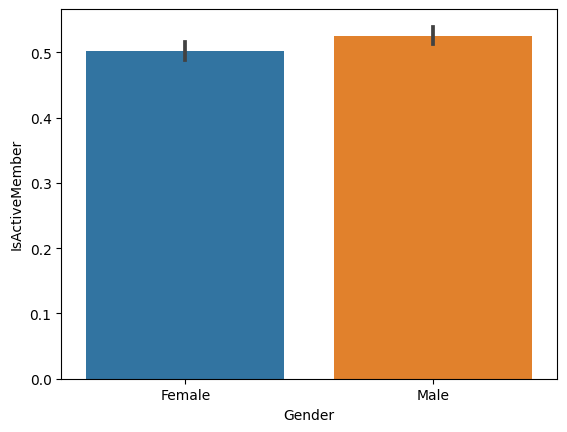

In [300]:
sns.barplot(x = data['Gender'], y = data['IsActiveMember'])

In [301]:
data.drop(columns = ['CustomerId'] , inplace = True)

In [302]:
data.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')